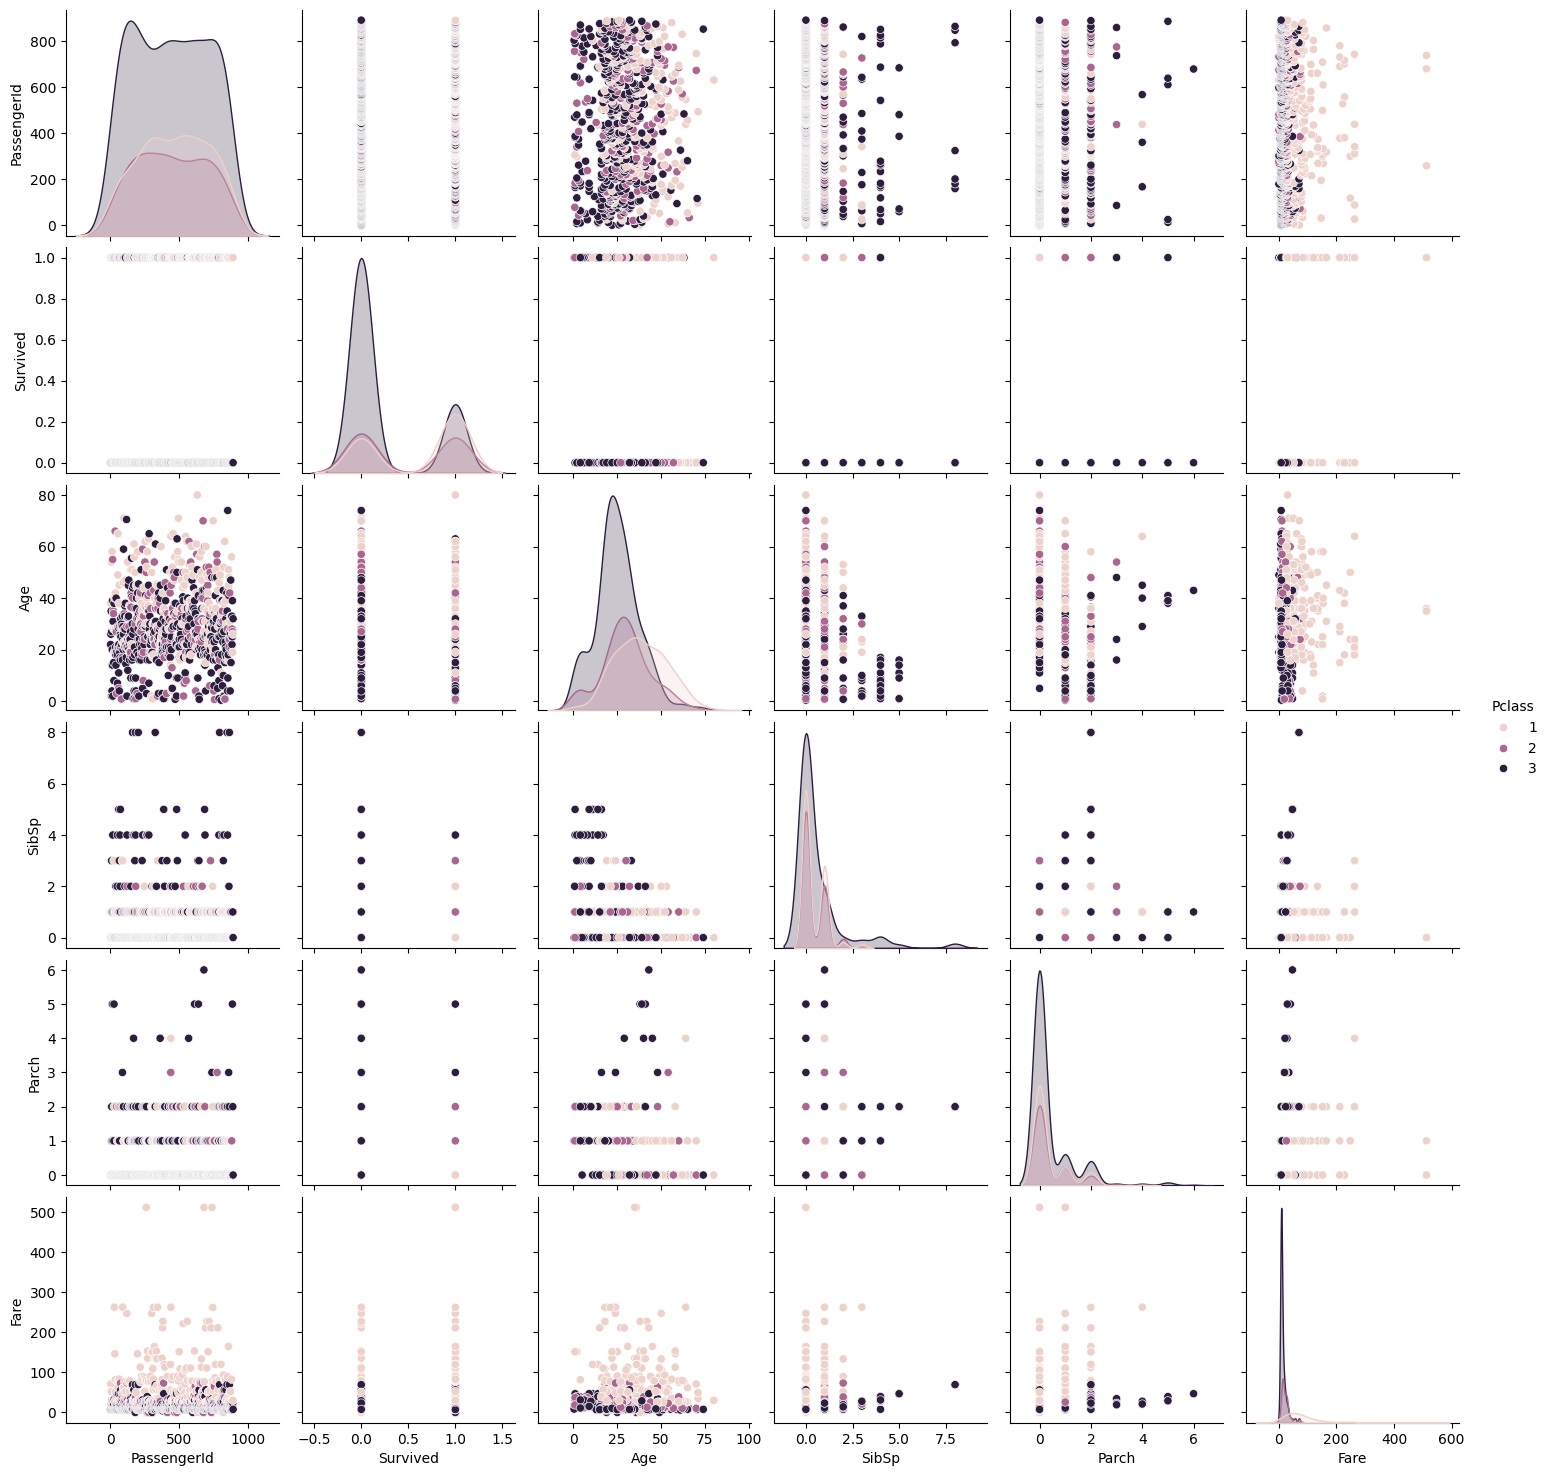

In [88]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('../datasets/titanic/train.csv')

sns.pairplot(df, hue='Pclass')

In [89]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Cabin', 'SibSp', 'Parch']]


In [91]:
df.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Cabin       687
SibSp         0
Parch         0
dtype: int64

In [92]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_11851/1413761131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_11851/1413761131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_11851/1413761131.py:2: FutureWarning: A value is trying to b

In [93]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].notna().astype(int)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


/tmp/ipykernel_11851/4078969792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
/tmp/ipykernel_11851/4078969792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].notna().astype(int)


In [94]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,1,0,False,True
1,1,1,1,38.0,71.2833,1,1,0,False,False
2,1,3,1,26.0,7.9250,0,0,0,False,True
3,1,1,1,35.0,53.1000,1,1,0,False,True
4,0,3,0,35.0,8.0500,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,0,0,False,True
887,1,1,1,19.0,30.0000,1,0,0,False,True
888,0,3,1,28.0,23.4500,0,1,2,False,True
889,1,1,0,26.0,30.0000,1,0,0,False,False


In [95]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [96]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

num_features = ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Cabin','Sex', 'Embarked_Q', 'Embarked_S']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)



In [97]:
x_train_processed = preprocessor.fit_transform(X_train)
x_test_processed   = preprocessor.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(x_train_processed, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [99]:
y_pred = model.predict(x_test_processed)

In [100]:
model.score(x_test_processed, y_test)

0.7988826815642458

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[90 15]
 [21 53]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



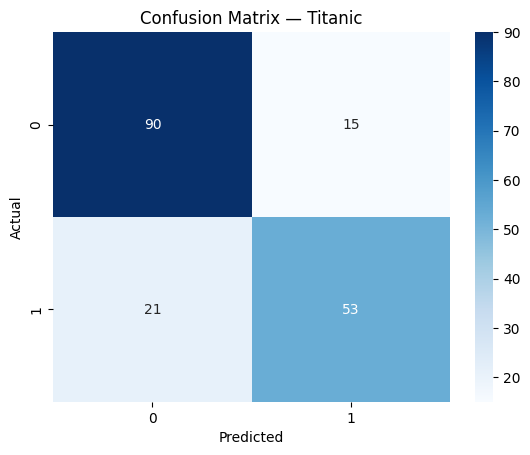

In [103]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Titanic")
plt.show()


In [108]:
y_tunned_pred = (model.predict_proba(x_test_processed)[:, 1] >= 0.4).astype(int)


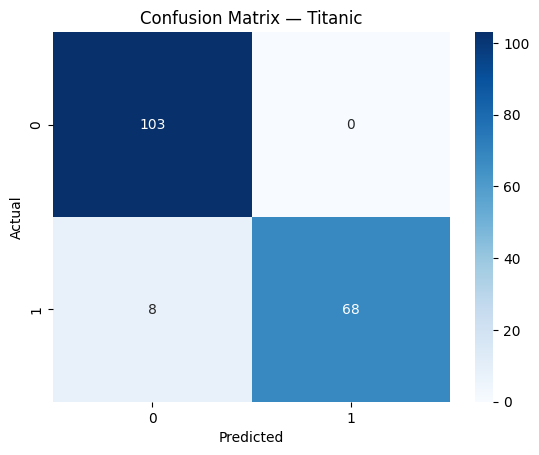

In [109]:
tcm = confusion_matrix(y_tunned_pred, y_pred)

sns.heatmap(tcm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Titanic")
plt.show()

In [112]:
print(classification_report(y_tunned_pred, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.89      0.94        76

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.95       179



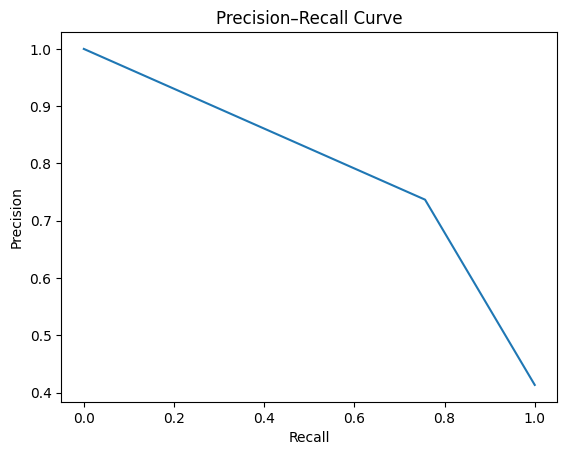

In [121]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_tunned_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [132]:
test_x = pd.read_csv('../datasets/titanic/test.csv')
test_x = test_x[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Cabin', 'SibSp', 'Parch']]
test_x['Age'].fillna(test_x['Age'].median(), inplace=True)
test_x['Embarked'].fillna(test_x['Embarked'].mode()[0], inplace=True)
test_x['Sex'] = test_x['Sex'].map({'male': 0, 'female': 1})
test_x['Cabin'] = test_x['Cabin'].notna().astype(int)
test_x = pd.get_dummies(test_x, columns=['Embarked'], drop_first=True)
test_x['Fare'].fillna(test_x['Fare'].mean(), inplace=True)

test_x

test_x.isna().sum()

/tmp/ipykernel_11851/1840442224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_x['Age'].fillna(test_x['Age'].median(), inplace=True)
/tmp/ipykernel_11851/1840442224.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
SibSp         0
Parch         0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [138]:
x_test_processed = preprocessor.transform(test_x)
y_tunned_pred = (model.predict_proba(x_test_processed)[:, 1] >= 0.4).astype(int)


In [1]:
submition_pred

NameError: name 'submition_pred' is not defined

In [145]:
test_df = pd.read_csv("../datasets/titanic/test.csv")
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': submition_pred
})

submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
submission.head()
submission.shape


(418, 2)

In [148]:
submission.to_csv("submission.csv", index=False)
